In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statistics as st
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

In [146]:
df=pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [148]:
df.duplicated().sum()

np.int64(0)

In [149]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [150]:
df_nullFree = df.dropna()

In [151]:
df_nullFree.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [152]:
mean_=df.mean()


# m_ph=st.mode(df_nullFree['ph'])
# m_su=st.mode(df_nullFree['Sulfate'])
# m_tr=st.mode(df_nullFree['Trihalomethanes'])
mean_

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [153]:
df.fillna(inplace=True,value=mean_)
# df["ph"].fillna(inplace=True,value=m_ph)
# df["Sulfate"].fillna(inplace=True,value=m_su)
# df['Trihalomethanes'].fillna(inplace=True,value=m_tr)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [154]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [155]:
correlation=df.corr()
correlation

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


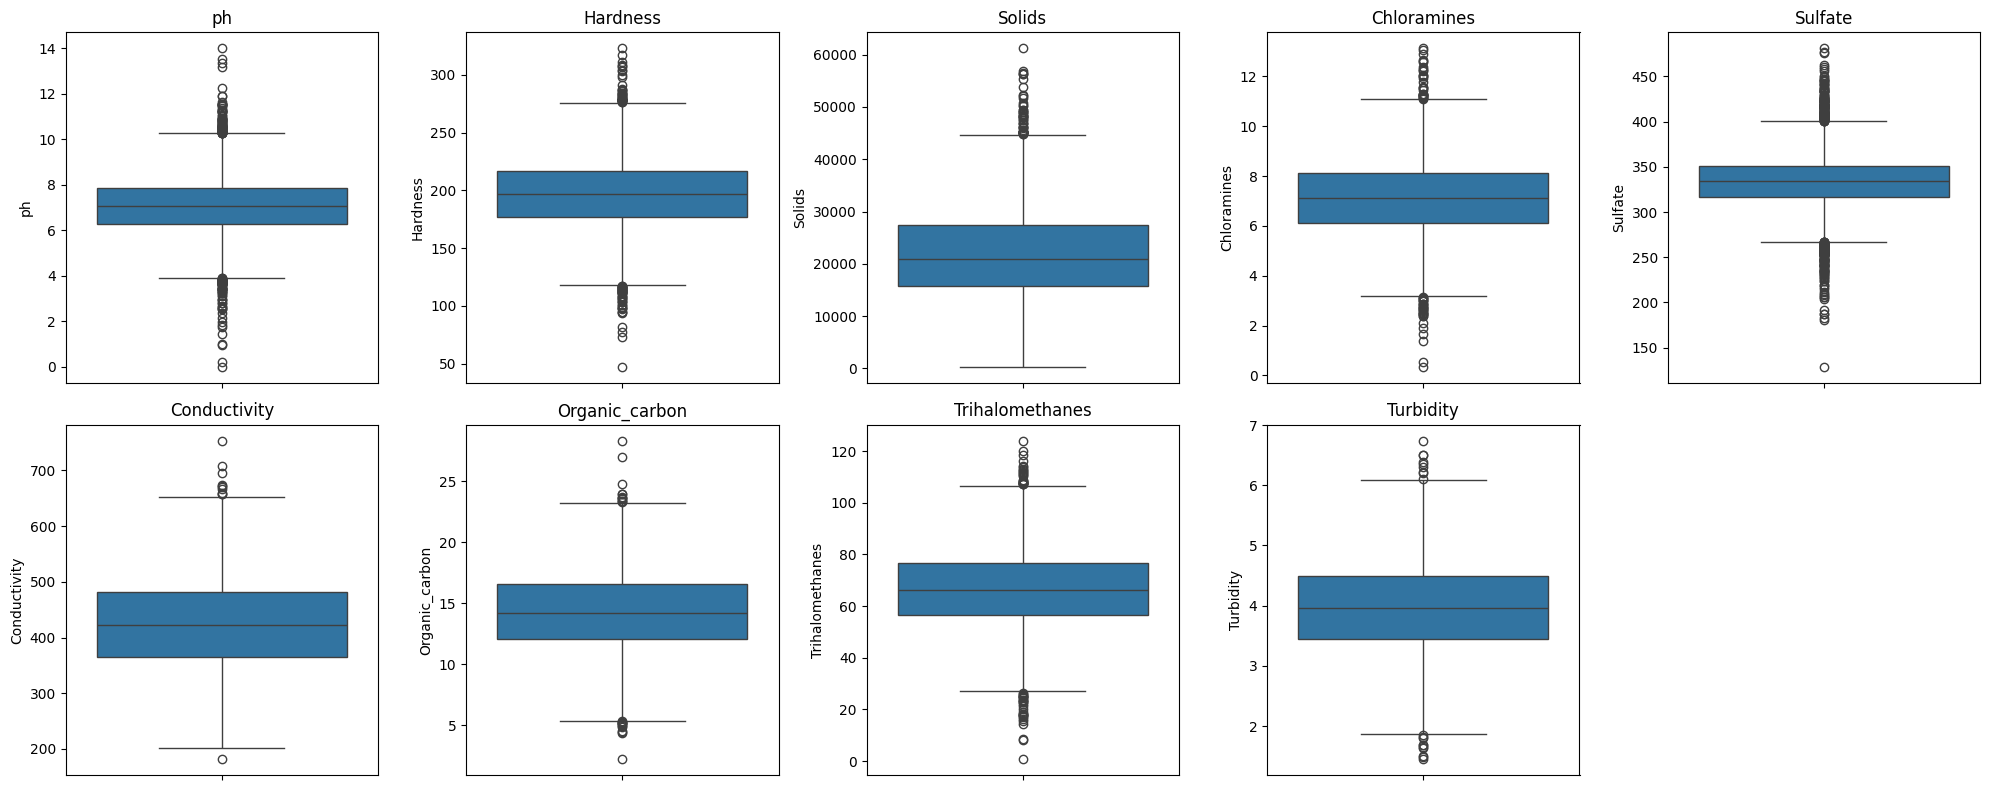

In [156]:
df_plotting=df.iloc[:,:-1]
plt.figure(figsize=(20, 8))

# Generate a boxplot for each column
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(2, 5, i)  # 2 rows, 5 columns (adjust based on the number of parameters)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [157]:
def replace_outliers(df, columns):
    """
    Replaces outliers in the specified columns of a DataFrame with boundary values using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to check for outliers.
        
    Returns:
        pd.DataFrame: DataFrame with outliers replaced by boundary values.
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                   # Interquartile range
        lower_bound = Q1 - 1.5 * IQR    # Lower bound
        upper_bound = Q3 + 1.5 * IQR    # Upper bound

        # Replace outliers with boundary values
        df[column] = df[column].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    
    return df


In [158]:
df=replace_outliers(df,df_plotting.columns)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.889107,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,44831.869873,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


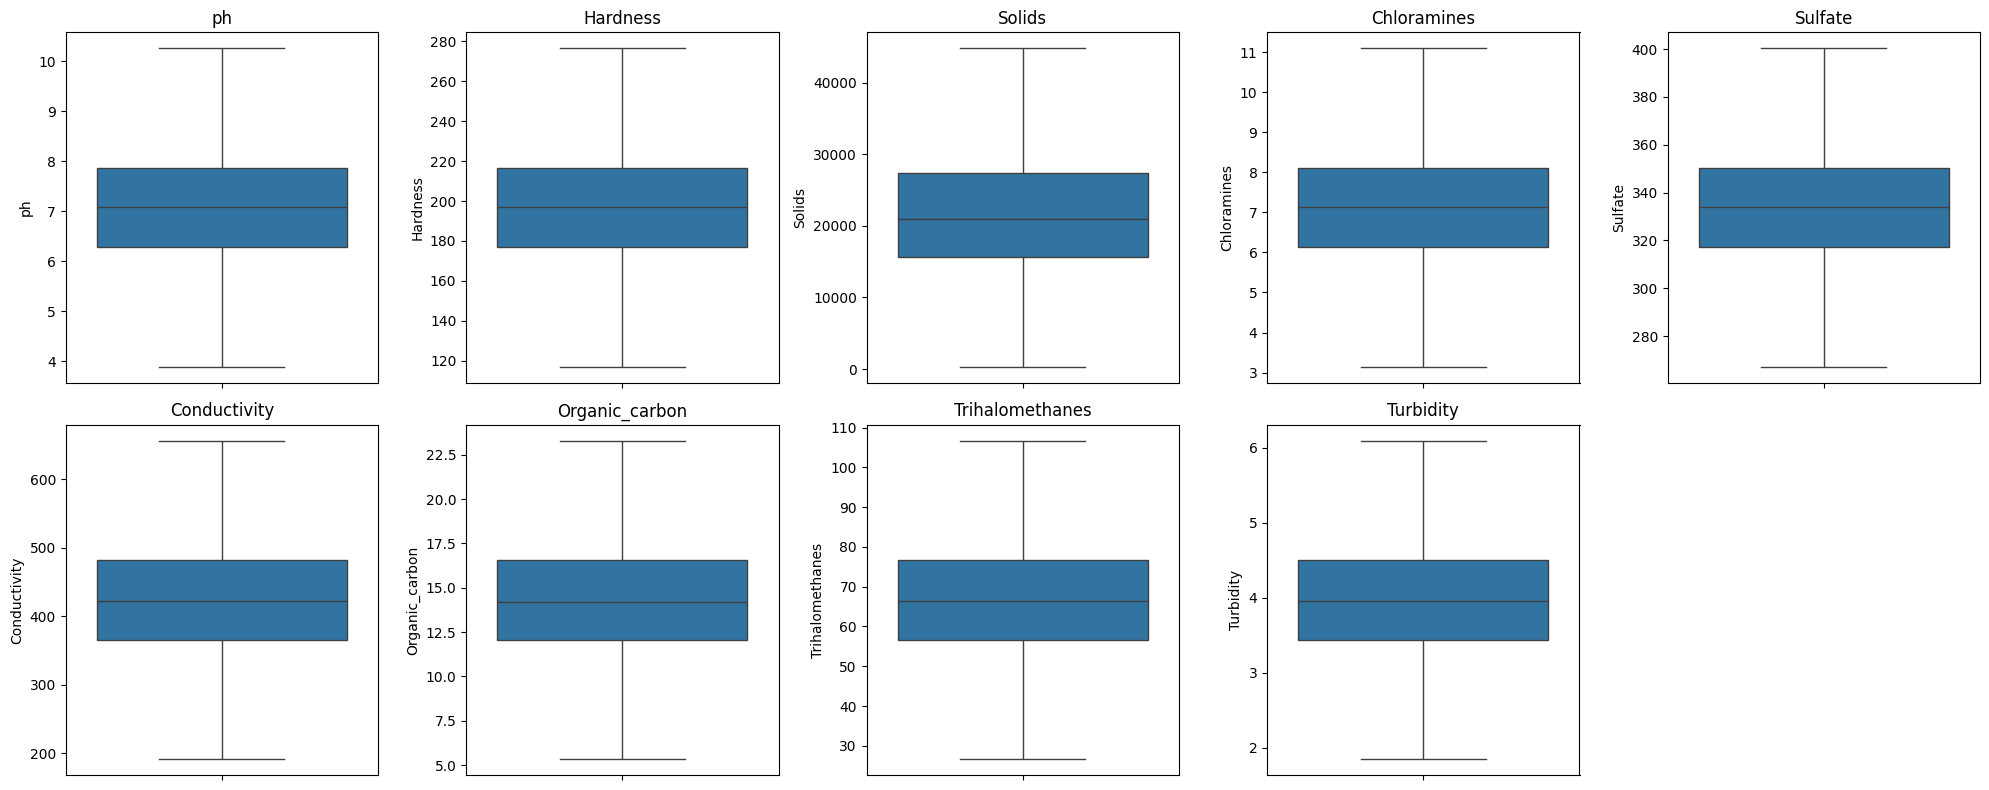

In [159]:
df_plotting=df.iloc[:,:-1]
plt.figure(figsize=(20, 8))

# Generate a boxplot for each column
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(2, 5, i)  # 2 rows, 5 columns (adjust based on the number of parameters)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [160]:
scaler=StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000612,0.265461,-0.135691,0.115564,1.093335,1.715401,-1.187299,1.328436,-1.292657,0
1,-2.309292,-2.091993,-0.387249,-0.315144,-0.000406,2.070162,0.272685,-0.651695,0.687944,0
2,0.737603,0.869786,-0.238325,1.395235,-0.000406,-0.093403,0.786278,-0.000022,-1.173116,0
3,0.895116,0.561689,0.007136,0.607257,0.727178,-0.780410,1.263149,2.190618,0.852978,0
4,1.456334,-0.477657,-0.463030,-0.372561,-0.744666,-0.344116,-0.828861,-2.222985,0.139720,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.745514,-0.084676,2.662484,0.029047,0.823593,1.245089,-0.118327,0.017260,0.604425,1
3272,0.527529,-0.088691,-0.538591,0.608572,-0.000406,-0.418121,1.709244,-0.001559,-1.505068,1
3273,1.693200,-0.644433,1.303434,0.147963,-0.000406,0.073429,-0.986778,0.221183,-0.860164,1
3274,-1.413570,1.068693,-1.160826,-0.530114,-0.000406,-0.288595,-0.947276,0.714752,0.955888,1


In [161]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3.276000e+03,3276.000000
mean,-5.612116e-16,-1.507409e-16,-2.271958e-16,-2.776235e-16,-2.056149e-15,-9.353527e-16,1.735147e-17,-1.301360e-16,-7.157482e-17,0.390110
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,0.487849
min,-2.309292e+00,-2.476150e+00,-2.518320e+00,-2.575035e+00,-2.097736e+00,-2.910950e+00,-2.723785e+00,-2.570343e+00,-2.728123e+00,0.000000
25%,-5.806274e-01,-6.104492e-01,-7.321673e-01,-6.440698e-01,-5.255788e-01,-7.497725e-01,-6.744986e-01,-6.311210e-01,-6.787427e-01,0.000000
50%,6.121225e-04,1.796822e-02,-1.198018e-01,5.508795e-03,-4.061619e-04,-5.269904e-02,-1.980727e-02,-1.558567e-03,-1.492293e-02,0.000000
75%,5.718160e-01,6.333513e-01,6.256933e-01,6.432406e-01,5.225261e-01,6.910125e-01,6.916921e-01,6.616937e-01,6.875106e-01,1.000000
max,2.300481e+00,2.499052e+00,2.662484e+00,2.574206e+00,2.094683e+00,2.852190e+00,2.740978e+00,2.600916e+00,2.736891e+00,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

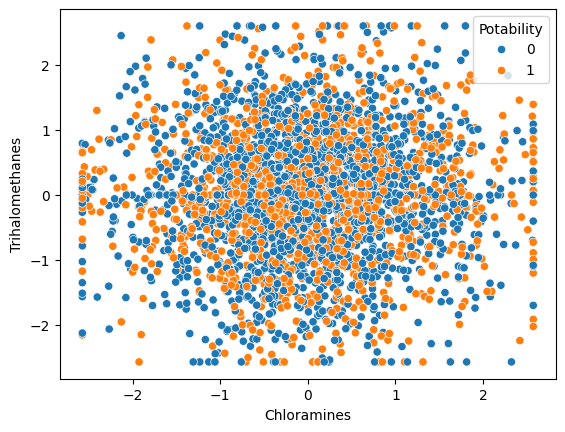

In [162]:
sns.scatterplot(x=df['Chloramines'],y=df['Trihalomethanes'],hue=df['Potability'])
plt.show

In [163]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [164]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

/home/muhammed_mahmoud/python_projects/python_env/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/muhammed_mahmoud/python_projects/python_env/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Feature Importances:
ph                 0.127817
Hardness           0.122304
Sulfate            0.120352
Chloramines        0.116647
Solids             0.114295
Conductivity       0.103329
Organic_carbon     0.100973
Trihalomethanes    0.097274
Turbidity          0.097008
dtype: float64
Cross-Validation Accuracy: 0.6282112269595979
Accuracy: 0.6785350966429298
Confusion Matrix:
 [[474 143]
 [173 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       617
           1       0.57      0.53      0.55       366

    accuracy                           0.68       983
   macro avg       0.65      0.65      0.65       983
weighted avg       0.67      0.68      0.68       983

ROC-AUC Score: 0.6956474568465428


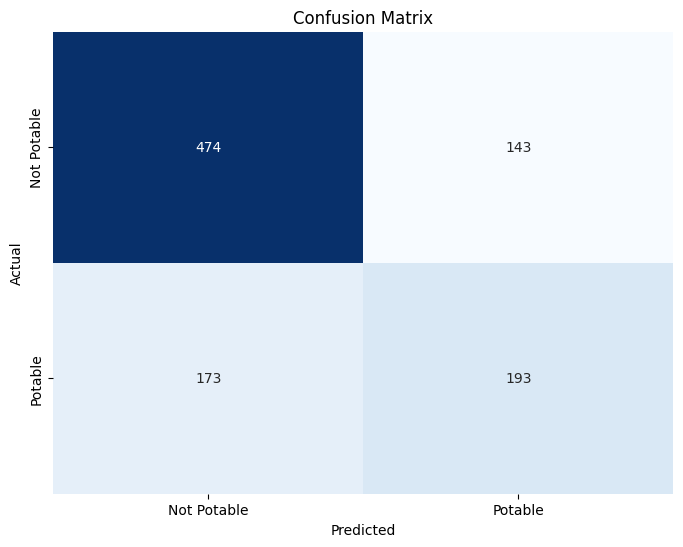

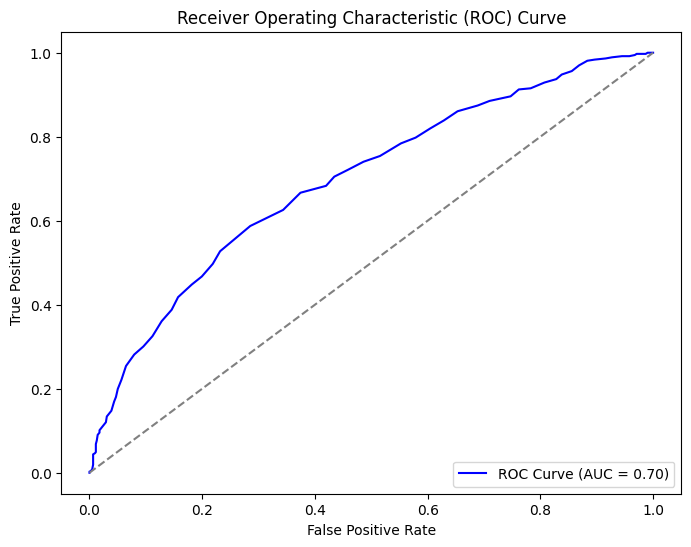

In [165]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x, y)
feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_resampled, y_resampled)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Evaluate the model on the test set
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [167]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [168]:
# len(y_resampled[y_resampled==0])

In [169]:
k = 57
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.96      0.78       617
           1       0.70      0.16      0.25       366

    accuracy                           0.66       983
   macro avg       0.68      0.56      0.52       983
weighted avg       0.67      0.66      0.58       983

Accuracy: 0.6602238046795524


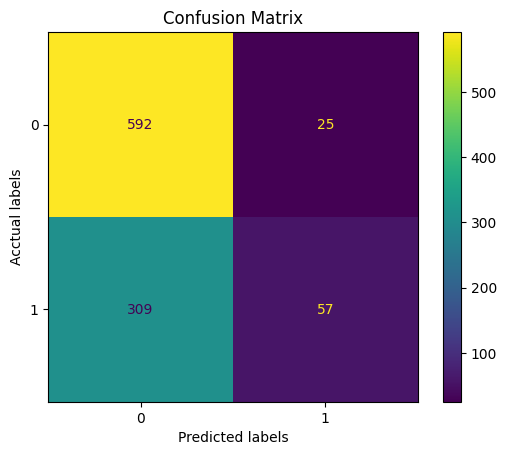

In [170]:
confusion_m=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=confusion_m)
display.plot()
plt.xlabel('Predicted labels')
plt.ylabel('Acctual labels')
plt.title('Confusion Matrix')
plt.show()